5dB 
4Tx: Train: 98.8%,  test: 97.1%
6Tx: Train: 99.8%.  test: 99.6%

20dB
4Tx: Train: 70.3%,  test: 65.3%
6Tx: Train: 80.9%.  test: 75.6%

25dB
4Tx: Train: 67.8%,  test: 52.2%
6Tx: Train: 53.9%.  test: 49.1%

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
path = './Times_New_Roman.ttf'
font_manager.fontManager.addfont(path)
import numpy as np

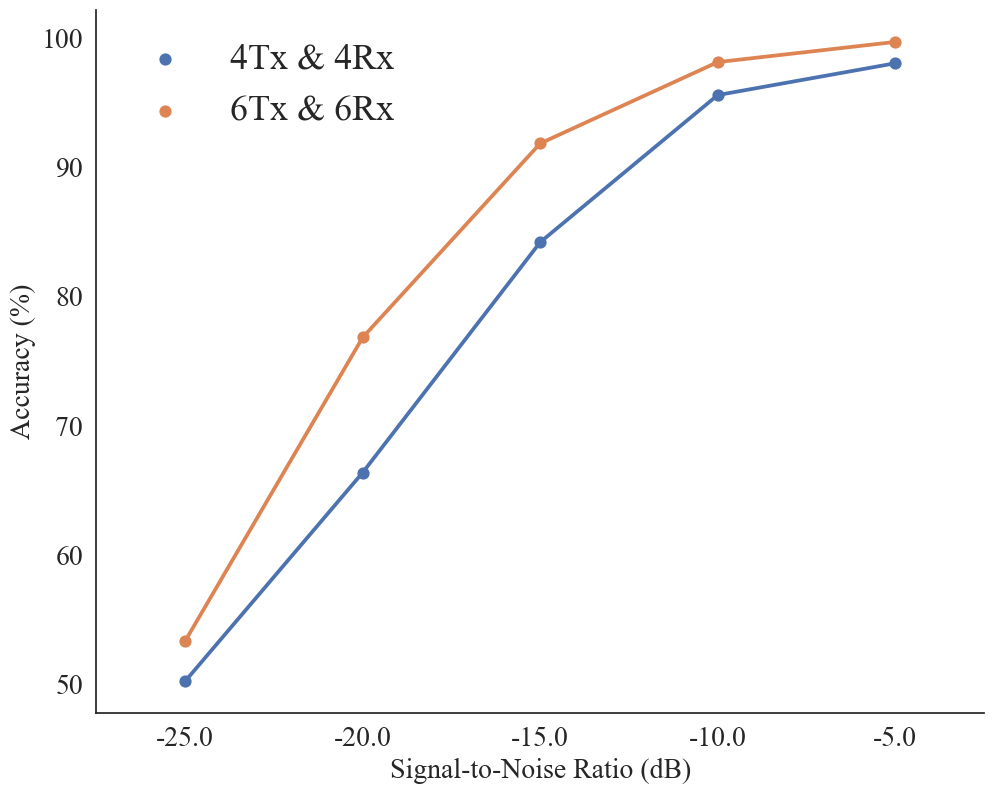

In [39]:
data = []
dBs = [-5, -10, -15, -20, -25]
A_4 = [98.03, 95.57, 84.19, 66.37, 50.23]
A_6 = [99.68, 98.12, 91.83, 76.82, 53.34]
data.append(dBs)
data.append(A_4)
data.append(A_6)
data = np.transpose(np.array(data))
df = pd.DataFrame(data, columns=['dB', '4Tx & 4Rx', '6Tx & 6Rx'])
df_melted = df.melt('dB', var_name='Antennas', value_name='Acc')
df_melted.head()


plt.rcParams['font.family'] = "Times New Roman"
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

sns.catplot(data=df_melted, x='dB', y='Acc', hue='Antennas', kind='point', height=8, aspect=10/8, legend=False)
sns.set_style('white')
plt.xlabel('Signal-to-Noise Ratio (dB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.grid(False)
#plt.title('Accuracy (%) in diffrent SNR ratio (dB)', fontsize=20)
plt.legend(loc='upper left', prop={"family":"Times New Roman", "size": 26})
plt.savefig('QAT_all_SNR_acc.png', bbox_inches='tight')

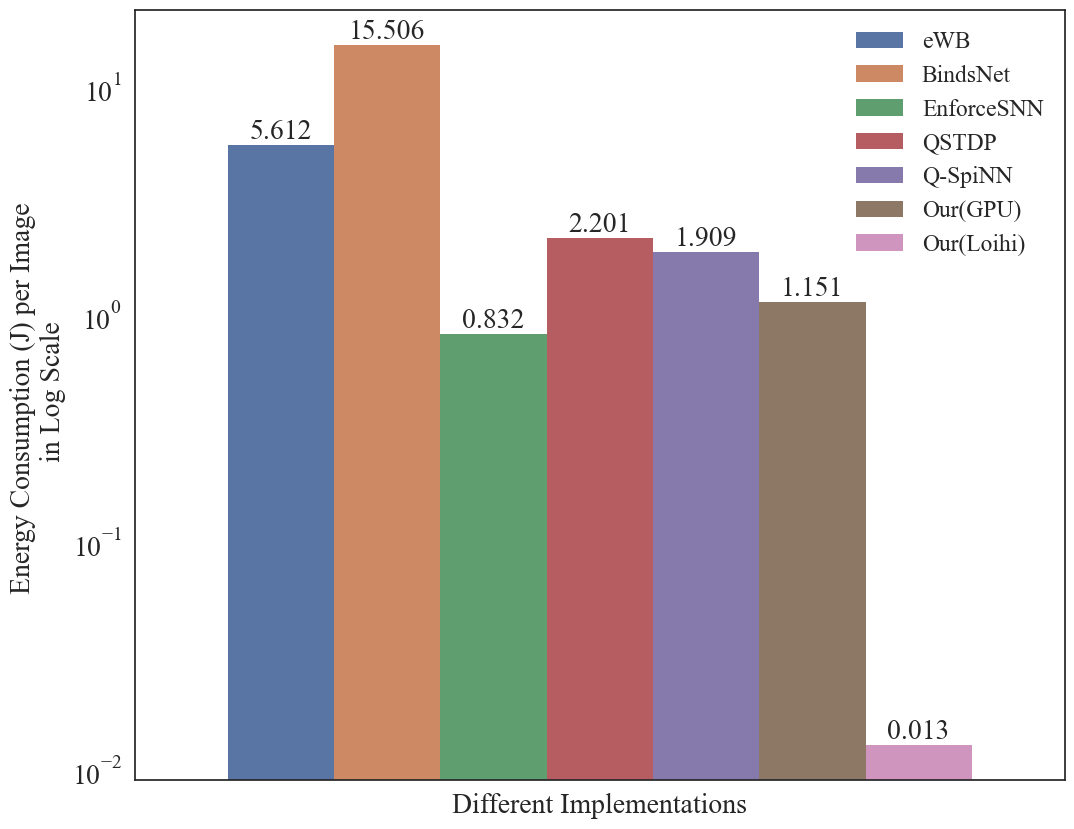

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = []
labels = ["Different Implementations"]
G1 = [5.612]
G2 = [15.506]
G3 = [0.832]
G4 = [2.201]
G5 = [1.909]
G6 = [1.151]
G7 = [0.013]
data.append(labels)
data.append(G1)
data.append(G2)
data.append(G3)
data.append(G4)
data.append(G5)
data.append(G6)
data.append(G7)
data = np.transpose(np.array(data))
df = pd.DataFrame(data, columns=['Different implementation', 'eWB', 'BindsNet', 'EnforceSNN', 'QSTDP', 'Q-SpiNN',
                                 'Our(GPU)', 'Our(Loihi)'])
df_melted = df.melt('Different implementation', var_name='Type', value_name='consumption')
df_melted['consumption'] = df_melted['consumption'].astype('float')
df_melted.head(10)   # fontsize of the tick labels

plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = "Times New Roman"
#sns.set(rc={'figure.figsize':(13.5,8), 'patch.linewidth': 0.0})
#sns.set_style("white")

p = sns.barplot(data=df_melted, x='Different implementation', y='consumption', hue='Type', log=True)
for i, container in enumerate(p.containers): 
    p.bar_label(p.containers[i], size=20)

plt.xlabel('', fontsize=20)
plt.ylabel('Energy Consumption (J) per Image \n in Log Scale', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=17)
plt.grid(False)
plt.legend(loc='upper right', prop={"family":"Times New Roman", "size": 17})
plt.savefig('normalized_energy_mnist_1.png', bbox_inches='tight')

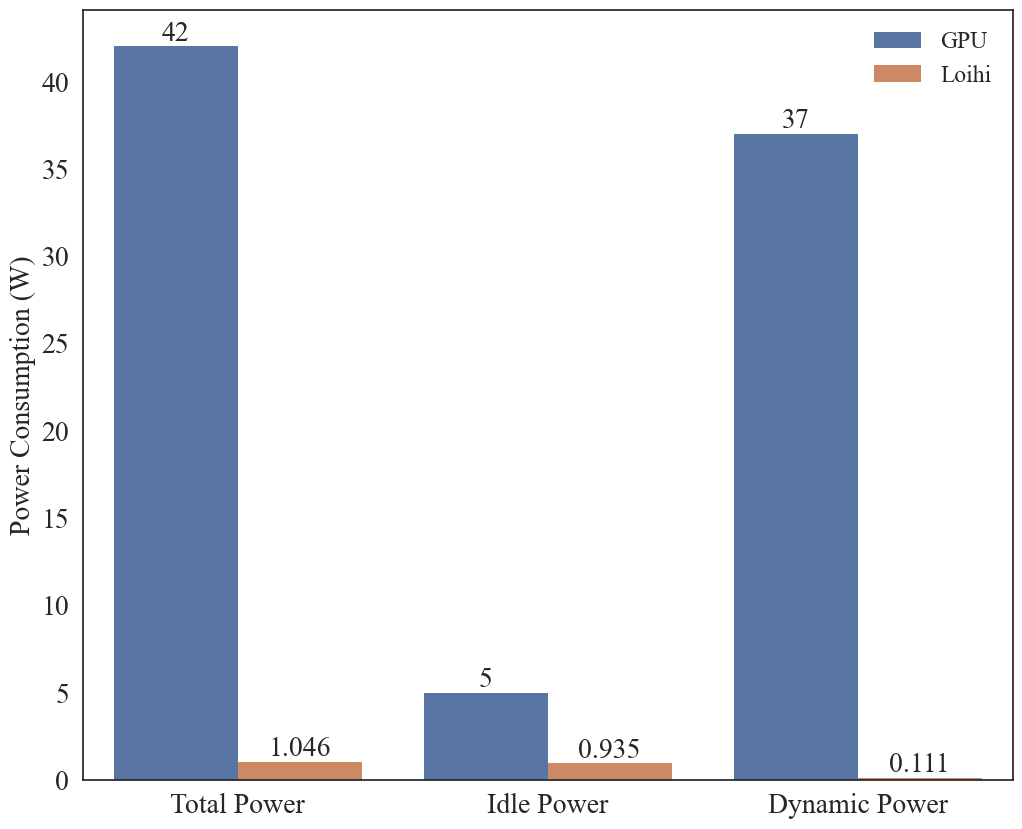

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = []
labels = ['Total Power', 'Idle Power', 'Dynamic Power']
GPU_power = [42, 5, 37]
Loihi_power = [1.046, 0.935, 0.111]
data.append(labels)
data.append(GPU_power)
data.append(Loihi_power)
data = np.transpose(np.array(data))
df = pd.DataFrame(data, columns=['power_type', 'GPU', 'Loihi'])
df_melted = df.melt('power_type', var_name='GPU_Loihi', value_name='consumption')
df_melted['consumption'] = df_melted['consumption'].astype('float')
df_melted.head(10)   # fontsize of the tick labels


plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = "Times New Roman"
#sns.set(rc={'figure.figsize':(10,8), 'patch.linewidth': 0.0})
#sns.set_style("white")
#sns.set_style("darkgrid")
p = sns.barplot(data=df_melted, x='power_type', y='consumption', hue='GPU_Loihi')
p.bar_label(p.containers[0], size=20)
p.bar_label(p.containers[1], size=20)
plt.xlabel('', fontsize=20)
plt.ylabel('Power Consumption (W)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=17)
plt.grid(False)
plt.savefig('power_spectrum_sensing.png', bbox_inches='tight')

AttributeError: 'BarContainer' object has no attribute 'set_color'

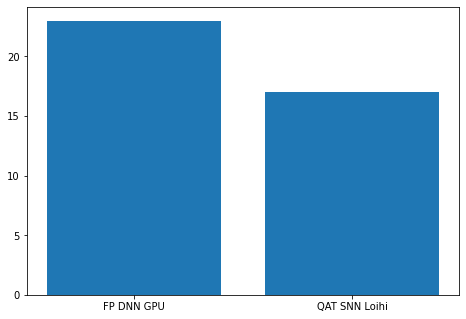

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['FP DNN GPU', 'QAT SNN Loihi']
students = [23,17]
rect1 = ax.bar(langs,students)
rect1.set_color('b')
ax.bar_label(rect1, padding=3)
plt.show()

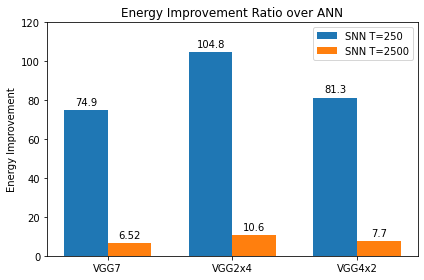

In [14]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['VGG7', 'VGG2x4', 'VGG4x2']
GPU_power = [74.9, 104.8, 81.3]
Loihi_power = [6.52, 10.6, 7.7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, GPU_power, width, label='SNN T=250')
rect2 = ax.bar(x + width/2, Loihi_power, width, label='SNN T=2500')

plt.ylim([0, 120])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Improvement')
ax.set_title('Energy Improvement Ratio over ANN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)

fig.tight_layout()

plt.show()

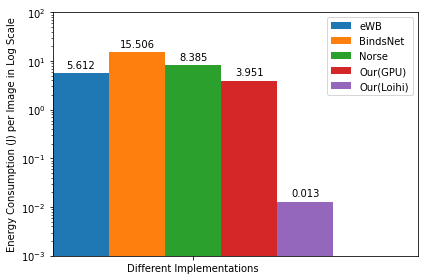

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

labels = ["Different Implementations"]
G1 = [5.612]
G2 = [15.506]
G3 = [8.385]
G4 = [3.951]
G5 = [0.013]
#GPU_power = [5.612, 15.506, 8.385, 3.950, 0.0129]
#Loihi_power = [0.0, 0.0, 0.0, 0.896]

x = np.arange(len(labels))  # the label locations
width = 0.2 #the width of the bars

fig, ax = plt.subplots()
rect1 = ax.bar(x - 0.4, G1, width, label='eWB')
rect2 = ax.bar(x - 0.2, G2, width, label='BindsNet')
rect3 = ax.bar(x - 0.0, G3, width, label='Norse')
rect4 = ax.bar(x + 0.2, G4, width, label='Our(GPU)')
rect5 = ax.bar(x + 0.4, G5, width, label='Our(Loihi)')

plt.ylim([0.001, 10**2])
plt.xlim([-0.5, 0.8])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (J) per Image in Log Scale')
#ax.set_title('Energe Consumption for Different Implementations (Batch size=1)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)
ax.bar_label(rect3, padding=3)
ax.bar_label(rect4, padding=3)
ax.bar_label(rect5, padding=3)

fig.tight_layout()

plt.show()

In [30]:
df_melted.head(10)

,Different implementation,Type,consumption
0,Different Implementations,eWB,5.612
1,Different Implementations,BindsNet,15.506
2,Different Implementations,Norse,8.385
3,Different Implementations,Our(GPU),3.951
4,Different Implementations,Our(Loihi),0.013


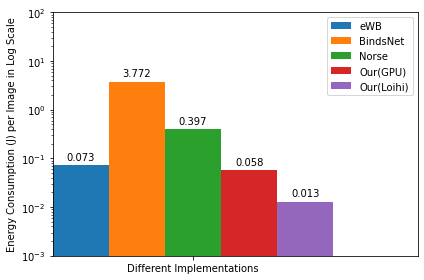

In [53]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Different Implementations']
G1 = [0.073]
G2 = [3.772]
G3 = [0.397]
G4 = [0.058]
G5 = [0.013]
#Loihi_power = [0.0, 0.0, 0.0, 0.896]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rect1 = ax.bar(x - 0.4, G1, width, label='eWB')
rect2 = ax.bar(x - 0.2, G2, width, label='BindsNet')
rect3 = ax.bar(x - 0.0, G3, width, label='Norse')
rect4 = ax.bar(x + 0.2, G4, width, label='Our(GPU)')
rect5 = ax.bar(x + 0.4, G5, width, label='Our(Loihi)')

plt.ylim([0.001, 10**2])
plt.xlim([-0.5, 0.8])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (J) per Image in Log Scale')
#ax.set_title('Energy Consumption per Image for Different Implementations (Batch size=128)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)
ax.bar_label(rect3, padding=3)
ax.bar_label(rect4, padding=3)
ax.bar_label(rect5, padding=3)

fig.tight_layout()

plt.show()

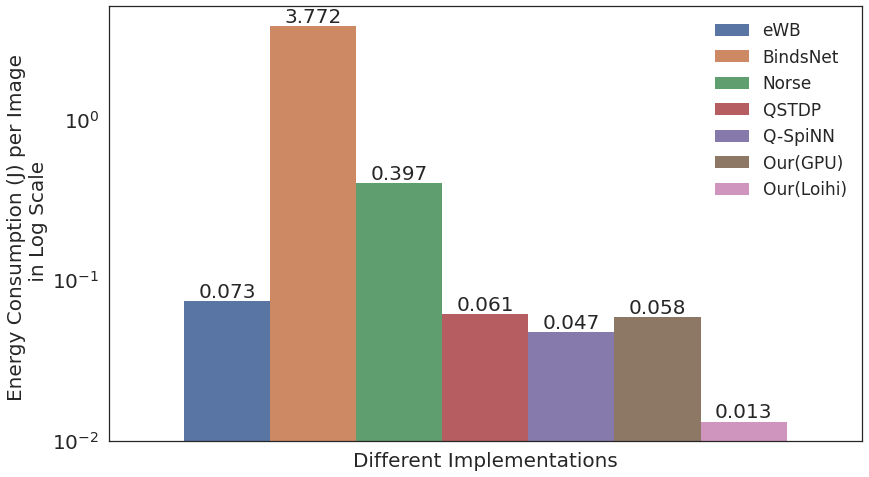

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = []
labels = ["Different Implementations"]
G1 = [0.073]
G2 = [3.772]
G3 = [0.397]
G4 = [0.061]
G5 = [0.047]
G6 = [0.058]
G7 = [0.013]
data.append(labels)
data.append(G1)
data.append(G2)
data.append(G3)
data.append(G4)
data.append(G5)
data.append(G6)
data.append(G7)
data = np.transpose(np.array(data))
df = pd.DataFrame(data, columns=['Different implementation', 'eWB', 'BindsNet', 'Norse', 'QSTDP', 'Q-SpiNN',
                                 'Our(GPU)', 'Our(Loihi)'])
df_melted = df.melt('Different implementation', var_name='Type', value_name='consumption')
df_melted['consumption'] = df_melted['consumption'].astype('float')
df_melted.head(10)   # fontsize of the tick labels


sns.set(rc={'figure.figsize':(13.5,8), 'patch.linewidth': 0.0})
sns.set_style("white")
#sns.set_style("darkgrid")
p = sns.barplot(data=df_melted, x='Different implementation', y='consumption', hue='Type', log=True)
for i, container in enumerate(p.containers): 
    p.bar_label(p.containers[i], size=20)

plt.xlabel('', fontsize=20)
plt.ylabel('Energy Consumption (J) per Image \n in Log Scale', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=17)
plt.grid(False)
plt.show()

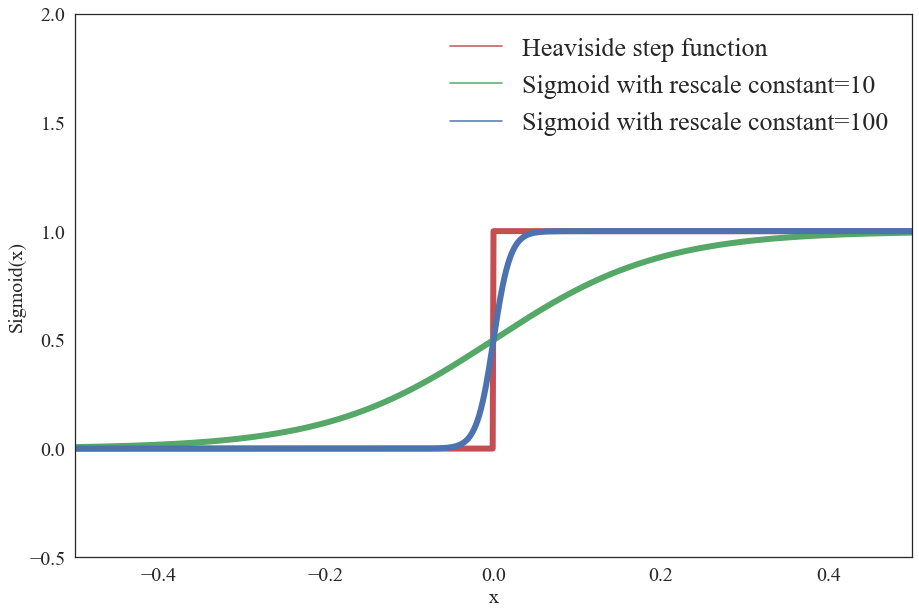

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = []
x = np.arange(-5., 5., 0.001)
y1 = [0 if num < 0 else 1 for num in x]
y2 = 1 / (1+np.exp(-10*x))
y3 = 1 / (1+np.exp(-100*x))
data.append(x)
data.append(y1)
data.append(y2)
data.append(y3)
data = np.transpose(np.array(data))
df = pd.DataFrame(data, columns=['x', 'Heaviside step function', 'Sigmoid with rescale constant=10', 
                                 'Sigmoid with rescale constant=100'])
df_melted = df.melt('x', var_name='type', value_name='y')
df_melted.head()
legend_list = ['Heaviside step function', 'Sigmoid with rescale constant=10', 'Sigmoid with rescale constant=100']

plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = "Times New Roman"
sns.lineplot(data=df_melted, x='x', y='y', hue='type', legend=True, linewidth = 6, palette=['r', 'g', 'b'])
sns.set(rc={'figure.figsize':(13.5,8), 'patch.linewidth': 0.0})
sns.set_style("white")
plt.xlabel('x', fontsize=20)
plt.ylabel('Sigmoid(x)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 2.0)
plt.grid(False)
#plt.title('Accuracy (%) in diffrent SNR ratio (dB)', fontsize=20)
plt.legend(loc='upper right', prop={"family":"Times New Roman", "size": 26})
plt.savefig('sigmoid.png', bbox_inches='tight')